# Exp 2: Sentiment Analysis
To analyze people’s sentiments and classify movie reviews

## **Trying with Multinomial Naive Bayes**

In [14]:
# Importing libraries
import pandas as pd
import numpy as np

In [3]:
# Reading the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.tsv', sep='\t') # tab separated file
data.shape # data frame shape

(156060, 4)

In [4]:
data.head() #1st 5 records

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


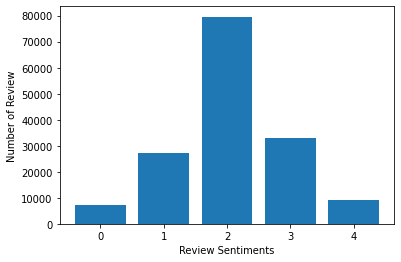

In [5]:
import matplotlib.pyplot as plt
Sentiment_count = data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

### Feature Generation using Bag of Words

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
#tokenizer to remove unwanted elements from out data like symbols and numbers

In [7]:
token

RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)

In [8]:
cv=CountVectorizer(lowercase=True, stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>,
                vocabulary=None)

In [9]:
text_counts= cv.fit_transform(data['Phrase'])

In [10]:
print(text_counts)

  (0, 11671)	1
  (0, 4517)	1
  (0, 3444)	1
  (0, 294)	1
  (0, 5735)	2
  (0, 5751)	1
  (0, 5512)	1
  (0, 9065)	1
  (0, 593)	1
  (0, 584)	1
  (0, 12673)	1
  (1, 11671)	1
  (1, 4517)	1
  (1, 3444)	1
  (1, 294)	1
  (1, 5735)	1
  (1, 5751)	1
  (2, 11671)	1
  (4, 11671)	1
  (5, 4517)	1
  (5, 3444)	1
  (5, 294)	1
  (5, 5735)	1
  (5, 5751)	1
  (7, 4517)	1
  :	:
  (156050, 11305)	1
  (156050, 9054)	1
  (156051, 11305)	1
  (156051, 9054)	1
  (156052, 11305)	1
  (156053, 11281)	1
  (156053, 1281)	1
  (156053, 5252)	1
  (156053, 6156)	1
  (156053, 1006)	1
  (156053, 2271)	1
  (156054, 11281)	1
  (156054, 5252)	1
  (156054, 6156)	1
  (156054, 1006)	1
  (156054, 2271)	1
  (156055, 11281)	1
  (156055, 6156)	1
  (156056, 5252)	1
  (156056, 1006)	1
  (156056, 2271)	1
  (156057, 1006)	1
  (156057, 2271)	1
  (156058, 1006)	1
  (156059, 2271)	1


### Split train and test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
text_counts, data['Sentiment'], test_size=0.2, random_state=1)

### Model Building and Evaluation

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6069140074330386


Accuracy is only 60%

### **Performance Evaluation Metrics**

#### Confusion Matrix

Confusion matrix, without normalization
[[  398   650   322    41     8]
 [  367  2320  2498   304    23]
 [  141  1469 12422  1809   123]
 [    9   246  2566  3271   462]
 [    6    31   278   916   532]]
Normalized confusion matrix
[[0.28 0.46 0.23 0.03 0.01]
 [0.07 0.42 0.45 0.06 0.  ]
 [0.01 0.09 0.78 0.11 0.01]
 [0.   0.04 0.39 0.5  0.07]
 [0.   0.02 0.16 0.52 0.3 ]]


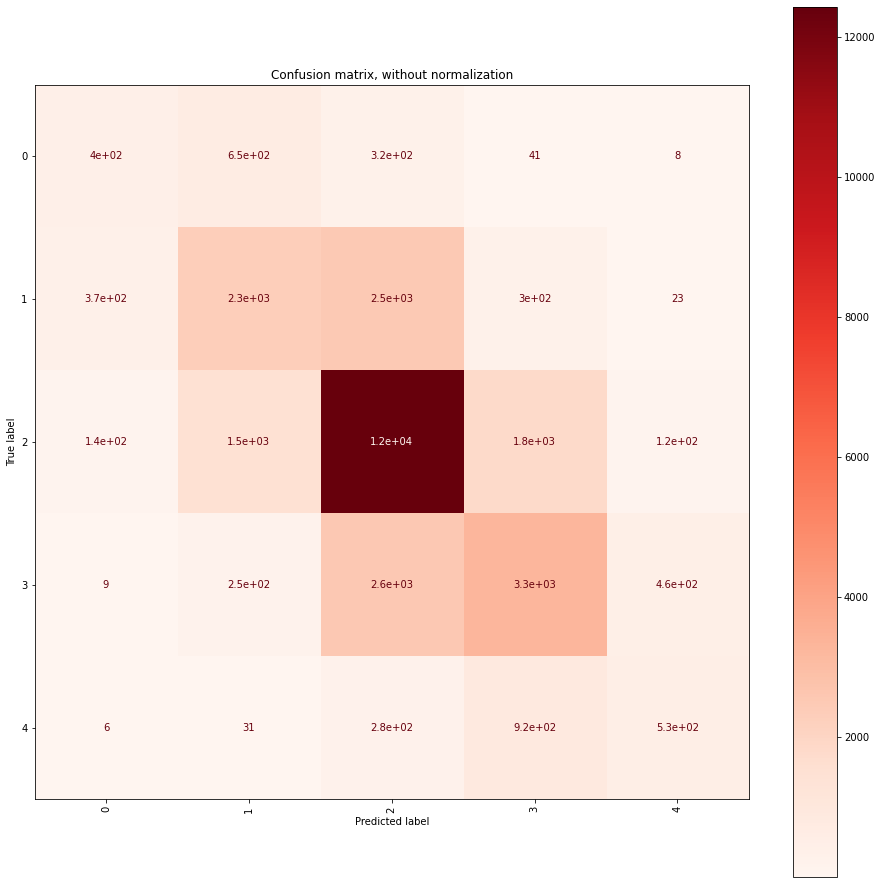

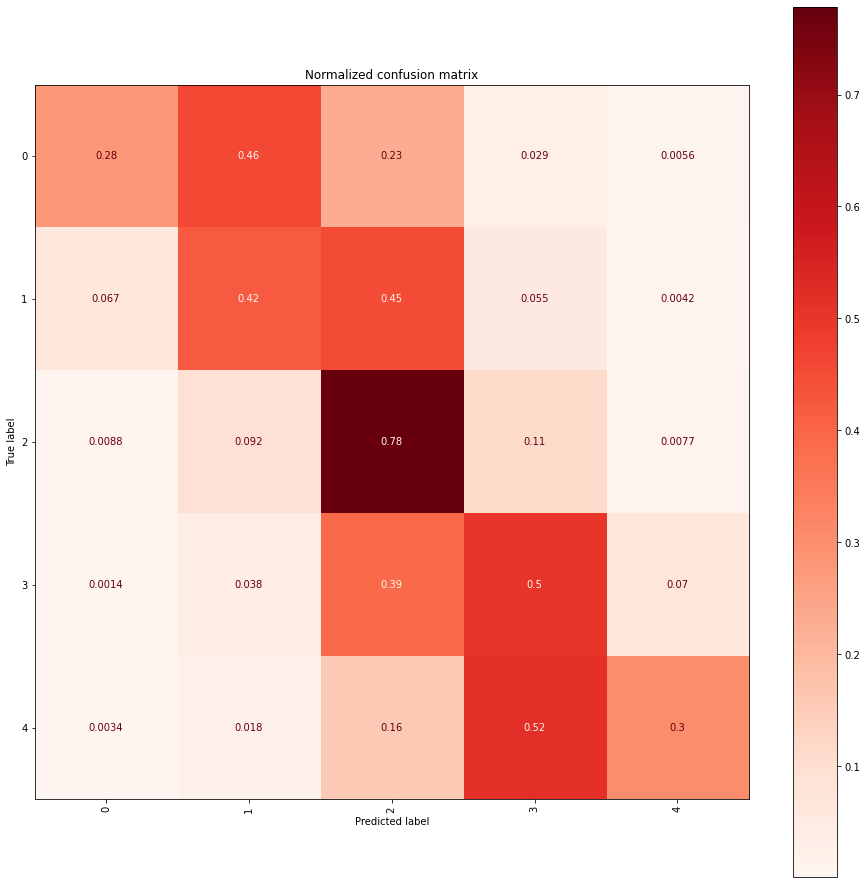

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
classifier = MultinomialNB().fit(X_train, y_train)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=Sentiment_count.index.values,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)
   
    print(title)
    print(disp.confusion_matrix)
    
    plt.rcParams["figure.figsize"] = (16,16)
    plt.xticks(rotation='vertical')
plt.show()

#### Precision - Recall

In [47]:
# Copying values of Confusion matrics to calculate Recision and recall
Calc = [[0.28, 0.46, 0.23, 0.03, 0.01],
 [0.07, 0.42, 0.45, 0.06, 0.0  ],
 [0.01, 0.09, 0.78, 0.11, 0.01],
 [0.0, 0.04, 0.39, 0.5,  0.07],
 [0.0, 0.02, 0.16, 0.52, 0.3 ]]

precision = [[0 for i in range(5)] for j in range(5)] 
recall = [[0 for i in range(5)] for j in range(5)]
 
for i in range(5):
  precision[i] = round(Calc[i][i]/sum(Calc[i]),2)

for i in range(5):
  temp=0
  for j in range(5):
    temp+=Calc[j][i]
  recall[i] = round(Calc[i][i]/temp,2)

tabl = {0:[precision[0], recall[0]], 1:[precision[1], recall[1]], 2:[precision[2], recall[2]], 3:[precision[3], recall[3]], 4:[precision[4], recall[4]],}

print("  Precision Recall")
tabl

  Precision Recall


{0: [0.28, 0.78],
 1: [0.42, 0.41],
 2: [0.78, 0.39],
 3: [0.5, 0.41],
 4: [0.3, 0.77]}

#### F score

In [50]:
F_score = {}

for key in range(5):
  F_score[key] = round(2*precision[key]*recall[key]/(precision[key]+recall[key])*100,2)

F_score

{0: 41.21, 1: 41.49, 2: 52.0, 3: 45.05, 4: 43.18}

## **Improved model - BERT model to analyse sentiments**

In [ ]:
import random
import gc

from tqdm import tqdm
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, random_split
from transformers import AutoModel, AutoTokenizer, AutoConfig, AdamW

gc.collect()

0

In [ ]:
random.seed(42)
torch.manual_seed(42)
np.random.seed(42)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.tsv', sep='\t')
print(train_df.shape)
print(train_df.info())
train_df.head()

(156060, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB
None


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.tsv', sep='\t')
print(test_df.shape)
print(test_df.info())
test_df.head()

(66292, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    66292 non-null  int64 
 1   SentenceId  66292 non-null  int64 
 2   Phrase      66292 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB
None


,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


#### Text Processing

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased', lower=True)

In [ ]:
class MovieReviewsDataset(Dataset):
    def __init__(self, df, max_len, test_only=False):
        self.max_len = max_len
        self.test_only = test_only
        self.text = df['Phrase'].tolist()
        if not self.test_only:
            self.sentiments = df['Sentiment'].values
            
        self.encode = tokenizer.batch_encode_plus(
            self.text,
            padding='max_length',
            max_length=self.max_len,
            truncation=True,
            return_attention_mask=True
        )
        
    def __getitem__(self, i):
        input_ids = torch.tensor(self.encode['input_ids'][i])
        attention_mask = torch.tensor(self.encode['attention_mask'][i])
        
        if self.test_only:
            return (input_ids, attention_mask)
        else:
            sentiments = self.sentiments[i]
            return (input_ids, attention_mask, sentiments)
    
    def __len__(self):
        return len(self.text)

In [ ]:
max_len = 64
train_dataset = MovieReviewsDataset(train_df, max_len)
test_dataset = MovieReviewsDataset(test_df, max_len, test_only=True)

lengths = [int(len(train_dataset) * 0.8), int(len(train_dataset) * 0.2)]
train_dataset, valid_dataset = random_split(train_dataset, lengths=lengths, generator=torch.Generator().manual_seed(42))

train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_dataloader = DataLoader(valid_dataset, batch_size=128)
test_dataloader = DataLoader(test_dataset, batch_size=128)

#### Model Creation

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()

        bert_base_config = AutoConfig.from_pretrained('bert-base-uncased')
        self.bert_base = AutoModel.from_pretrained('bert-base-uncased', config=bert_base_config)
        self.classifier = nn.Linear(bert_base_config.hidden_size, 5)

    def forward(self, input_ids, attention_mask):
        bert_base_output = self.bert_base(input_ids=input_ids, attention_mask=attention_mask)
        # get last hidden state
        # bert_base_last_hidden_state = bert_base_output[0]
        # or
        # roberta_base_last_hidden_state = roberta_base_output.hidden_states[-1]

        # pooler_output – Last layer hidden-state of the first token of the sequence 
        # (classification token) further processed by a Linear layer and a Tanh activation function
        pooler_output = bert_base_output[1] # [batch_size, hidden] 
        out = self.classifier(pooler_output)
        return out


gc.collect()

88

In [ ]:
model = Model()
model.to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)
criteron = nn.CrossEntropyLoss()
gc.collect()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


376

In [ ]:
total_loss = []
total_val_acc = []
for epoch in range(3):
    model.train()
    epoch_loss = []
    for input_ids, attention_mask, target in tqdm(train_dataloader):
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)            
        target = target.to(device)
        
        optimizer.zero_grad()
        
        y_pred = model(input_ids, attention_mask)
        
        loss = criteron(y_pred, target)
        loss.backward()
        optimizer.step()
        
        epoch_loss.append(loss.item())

    input_ids = input_ids.to(torch.device('cpu'))
    attention_mask = attention_mask.to(torch.device('cpu'))            
    target = target.to(torch.device('cpu'))
    gc.collect()

    val_accs = []
    model.eval()
    for input_ids, attention_mask, target in tqdm(val_dataloader):
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)        
        y_pred = model(input_ids, attention_mask)
        _, y_pred = torch.max(y_pred, -1)
        acc = torch.mean((torch.tensor(y_pred.cpu() == target.cpu(), dtype=torch.float)))
        val_accs.append(acc.cpu())
      
    el = sum(epoch_loss)/len(epoch_loss)
    total_loss.append(el)
    acc = np.array(val_accs).mean()
    total_val_acc.append(acc)
    print("Epoch:", epoch+1, "-- loss:", el, "-- acc:", acc)
    gc.collect()

  0%|          | 0/976 [00:00<?, ?it/s]

Epoch: 1 -- loss: 0.824890318952623 -- acc: 0.68689877


  0%|          | 0/976 [00:00<?, ?it/s]

Epoch: 2 -- loss: 0.6767268605285981 -- acc: 0.69326216


 49%|████▉     | 477/976 [10:36<11:05,  1.33s/it]

Improved Accuracy = 69.32%

## **Conclusion**

Sentiment analysis is a type of data mining that measures the inclination of people’s opinions through natural language processing (NLP), computational linguistics and text analysis.
We can use Sentiment Analysis to extract and analyze subjective information from the Web - mostly social media and similar sources. 

To evaluate performance we chose the following metrics:
1. **Accuracy -** Accuracy is the measure of correct predictions made by our model. It is equal to the number of correct predictions made upon total number of predictions made by the model. **We achieved an accuracy of 60% using Multinomial Naive Bayes.** 

2. **Confusion Matrix-** Confusion matrix is a simple table having two dimensions: ‘actual’ and ‘predicted’, and for both the dimensions it has same sets of classes. **We have plotted Confusion matrix in 2 ways with and without Normalization. We can observe that sentiments labeled 2 were best predicted with the current model.**

3. **Precision -** It is the ratio of true positive samples to all samples classified as positive. It is also known as Positive Predictive Value (PPV).

4. **Recall -** It is the ratio of true positive samples to all samples that are actually positive. It is also called True Positive Rate (TPR) or sensitivity. **We found out precision and recall for each of the 5 classes and stored it in a dictionary to use it later for finding F score.**

5. **F score -** It is a combination of precision and recall and that is why it is a popular performance metric. Like other metrics F1-score best value is 100 and worst value is 0. **The F scores of all the classes were calculated, it ranges from 41% to 52%. Sentiments labelled 2 have the highest F score of 52%, indicating it is least likely to get misclassified.**

Finally, we used **BERT model** to improve the accuracy of predicting sentiments from the given dataset. BERT model was proposed by researchers at Google AI language in 2018. BERT stands for Bidirectional Representation for Transformers. We have used BERT base here which is a 12 layers of encoder stack with 12 bidirectional self-attention heads and 768 hidden units. We got an **accuracy of 69.32%**.